In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import quad
import math
from scipy.optimize import minimize_scalar
import time
from scipy.interpolate import interp1d

plt.rcParams.update({
	'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30,
    'figure.figsize' : (10,6)})
plt.rcParams.update({'font.size': 20})

path 	= str("D:/Gilles Koziol/Documents/UNI/Master-1/Statistical Methods/Images/")
kb      = 1.380649e-23#J/K
m       =40*1.66*1e-27
T       =3
n       =1
mu      =30*kb*T
beta    = 1/(kb*T)
meanTH  = (3/5)*n*mu

# Task 1

We define the function, without the normalisation factor A, so that we can have a function that is normalised for all T

In [2]:
def f_NotNormalized(epsilon,Temp):
    beta    = 1/(kb*Temp)
    num     = np.sqrt(epsilon)
    den     = np.exp(beta*(epsilon-30*kb*Temp)) + 1.0
    return num/den

T_i         = np.linspace(0.5,10,500)
listIntNN   = np.zeros(len(T_i))

for i in range(len(T_i)):
    listIntNN[i] = quad(lambda eps: f_NotNormalized(eps, T_i[i]), 0,2*30*kb*T_i[i])[0]

Apts = 1/listIntNN
A_T = interp1d(T_i, Apts , kind='cubic')

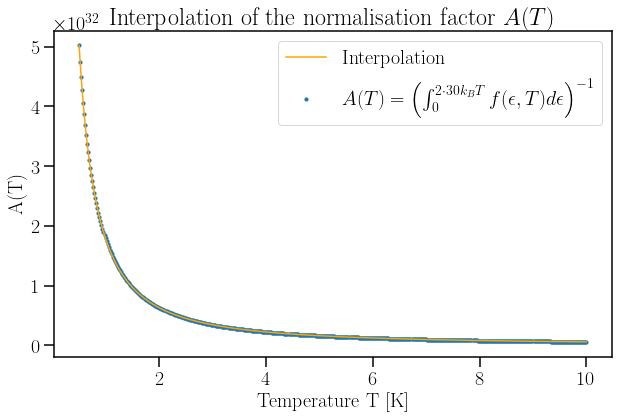

In [3]:
plt.scatter(T_i, Apts, s=10, label = r"$A(T) = \left(\int_0^{2\cdot30k_BT} f(\epsilon,T) d\epsilon\right)^{-1}$")
plt.plot(T_i,A_T(T_i), color = "orange", label = "Interpolation")

plt.title("Interpolation of the normalisation factor $A(T)$")
plt.xlabel("Temperature T [K]")
plt.ylabel("A(T)")
plt.legend()

#plt.savefig(path+"NormFactor.png")


We then define all the functions related to the pdf (to compute mean and so on)

In [4]:
def f(epsilon,Temp):
    beta    = 1/(kb*T)
    num   = float(A_T(Temp))*np.sqrt(epsilon)
    den   = np.exp(beta*(epsilon-30*kb*Temp)) + 1.0
    return num/den

def exp_val(epsilon):
	return epsilon*f(epsilon,3)

def moment_2(epsilon):
	return epsilon*epsilon*f(epsilon,3)

def gauss(x, gmean, gsigma):
    pref = 1/(np.sqrt(2*np.pi)*gsigma)
    return pref*np.exp(-(x-gmean)*(x-gmean)/(2*gsigma*gsigma))

#integral with trapeze
def integral(n):
    nPts=n+1
    nInt=n
    x=np.linspace(0,2*mu,nPts)
    y=np.zeros(len(x))
    for i in range(len(x)):
        denom = np.exp(beta*(x[i]-mu))+1
        y[i]=float(A_T(3))*np.sqrt(x[i])/denom
    integrale=0
    for i in range(n):
        integrale += (y[i]+y[i+1])*(x[i+1]-x[i])/2
    return integrale

Check the normalisations and the means

In [5]:
I = quad(lambda epsilon : f(epsilon, T), 0 , 2*30*kb*T)
I = I[0]
ExpVal = quad(exp_val, 0, 2*30*kb*T)
ExpVal = ExpVal[0]
varPDF = quad(moment_2,0,2*30*kb*T)[0]-ExpVal**2
corrFac = meanTH/ExpVal
delta   = (3*30*kb)/(5*corrFac)
gamma   = (3/(5*corrFac))

print(  " The integral of f:\t" ,  I 
        ,"\n The exp.value: \t" , ExpVal
        , "\n The theoretical :\t", meanTH
        , "\n The variance  :\t", varPDF
        , "\n Mean Th after corr:\t", meanTH/corrFac)

 The integral of f:	 0.9995695662402224 
 The exp.value: 	 7.4930749512295925e-22 
 The theoretical :	 7.4555046e-22 
 The variance  :	 1.0964155985264316e-43 
 Mean Th after corr:	 7.4930749512295925e-22


Plot for the report

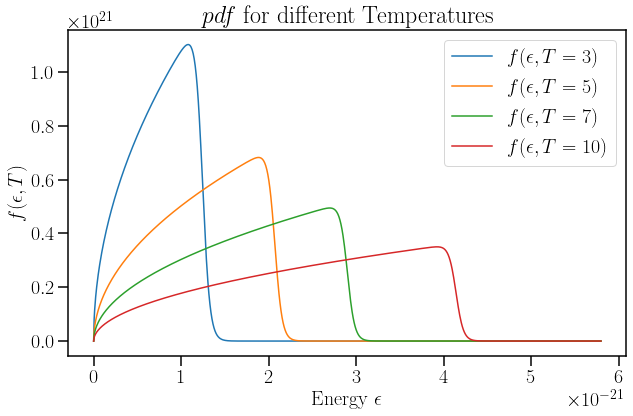

In [6]:
xfunc   = np.linspace(0,2*30*kb*7, 1000)
yfunc3  = f(xfunc,3)
yfunc5  = f(xfunc,5)
yfunc7  = f(xfunc,7)
yfunc10 = f(xfunc,10)

plt.plot(xfunc,yfunc3, label = "$f(\epsilon, T=3)$")
plt.plot(xfunc,yfunc5, label = "$f(\epsilon, T=5)$")
plt.plot(xfunc,yfunc7, label = "$f(\epsilon, T=7)$")
plt.plot(xfunc,yfunc10, label= "$f(\epsilon, T=10)$")

plt.title("$pdf$ for different Temperatures")
plt.xlabel("Energy $\epsilon$")
plt.ylabel("$f(\epsilon, T)$")
plt.legend()

#plt.savefig(path+"pdfT.png")


Again :)

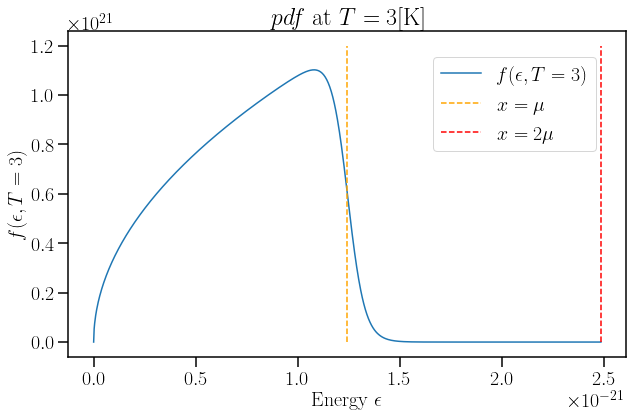

In [7]:
xfunc = np.linspace(0,2*30*kb*3, 1000)
yfunc3 = f(xfunc,3)

plt.plot(xfunc,yfunc3, label = "$f(\epsilon, T=3)$")
plt.plot([mu,mu]    ,[0,1.2e21], "--", color = "orange" , label = "$x=\mu$")
plt.plot([2*mu,2*mu],[0,1.2e21], "--", color = "red"    , label = "$x=2\mu$")

plt.title("$pdf$ at $T=3$[K]")
plt.xlabel("Energy $\epsilon$")
plt.ylabel("$f(\epsilon, T=3)$")
plt.legend(bbox_to_anchor=(0.8,0.6))

#plt.savefig(path+"pdf.png")

The small code to compute numerical integral with trapeze (see definition of function above)

0.9995686858413102


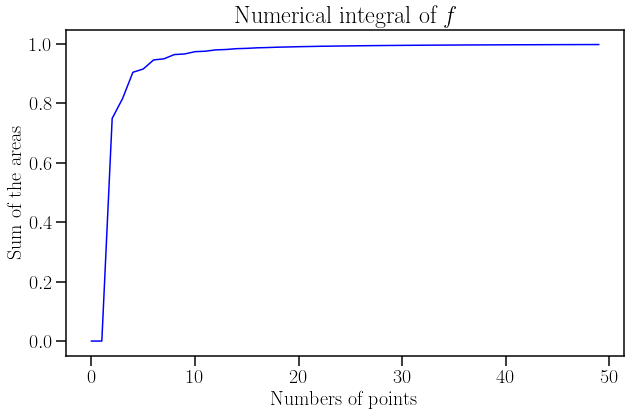

In [8]:
listint = np.zeros(50)
xplot = [*range(len(listint))]

for i in range(len(listint)):
    listint[i] = integral(i)

plt.plot(xplot,listint, color = "blue")
plt.xlabel("Numbers of points")
plt.ylabel("Sum of the areas")
plt.title("Numerical integral of $f$")
plt.savefig(path+"nIntegral.png")

print(integral(int(1e4)))



Define the sample Generator

In [21]:
def Egenerator(N, Temp):
    xf=np.linspace(0,2*mu,1000)
    yf=f(xf, Temp)
    ymax = np.max(yf)*1.01
    p = 1/((2*mu)*ymax) # Probability that an event is recorded
    Nrand = int(N/(p-0.001)) 
    ok = 0
    
    while ok == 0 :
        x = np.random.rand(Nrand)*(2*mu)
        y = np.random.rand(Nrand)*ymax
        data = x[np.where(y<=f(x,Temp))]
        if len(data)>=N:
            ok = 1
    data = data[:int(N)]
    return data

In [20]:
Egenerator(1e4,3)

array([7.87739488e-22, 1.30930403e-21, 5.20311727e-22, ...,
       9.01873660e-22, 1.95524495e-22, 4.28562632e-22])

Only for plotting purposes

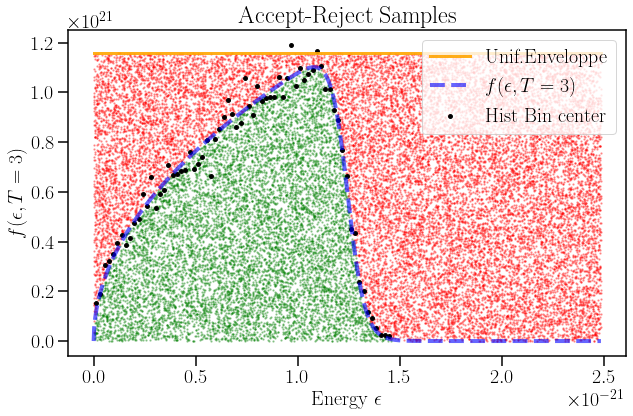

In [14]:
nEvents = 1e4
listAccX =[]
listAccY =[]
listRejX =[]
listRejY =[]
interval= (0, 2*mu)
fmax    = np.max(f(np.linspace(*interval,1000),3))*1.05
gen     = np.random.default_rng()
while len(listAccX)<nEvents :
    x       = gen.uniform(*interval)
    y       = gen.uniform(0, fmax)
    if y <= f(x, T):
        listAccX.append(x)
        listAccY.append(y)
    else:
        listRejX.append(x)     
        listRejY.append(y) 

cc, ee = np.histogram(listAccX, density=True, bins = 70)
wi = ee[1]-ee[0]
xC = ee[:-1]+wi/2


xfunc = np.linspace(0,2*mu,1000)
yfunc = f(xfunc,3)

plt.scatter(listAccX,listAccY   , s = 2     , color = "green"   , alpha = 0.3)
plt.scatter(listRejX,listRejY   , s = 2     , color = "red"     , alpha = 0.3)
plt.plot([0,2*mu],[fmax,fmax]   , lw =3     , color = "orange"  , alpha = 0.9   , label = "Unif.Enveloppe")
plt.scatter(xC,cc               , s = 15    , color = "black"                   , label = "Hist Bin center")
#plt.fill([1.51e-21,2*mu,2*mu,1.51e-21],[0.7e21,0.7e21,fmax*1.01,fmax*1.01], color = "white", alpha = 0.8)
plt.plot(xfunc,yfunc, "--", color = "blue", alpha = 0.6,lw = 4, label = r"$f(\epsilon, T=3)$")

plt.xlabel("Energy "+r"$\epsilon$")
plt.ylabel(r"$f(\epsilon, T=3)$")
plt.title("Accept-Reject Samples")
plt.legend()

#plt.savefig(path+"AcceptReject.png")

Compute the mean

The mean is :  7.497640607543589e-22  
The theoretial mean is :  7.4930749512295925e-22 
The mean computed with numpy is :  7.497673002410204e-22


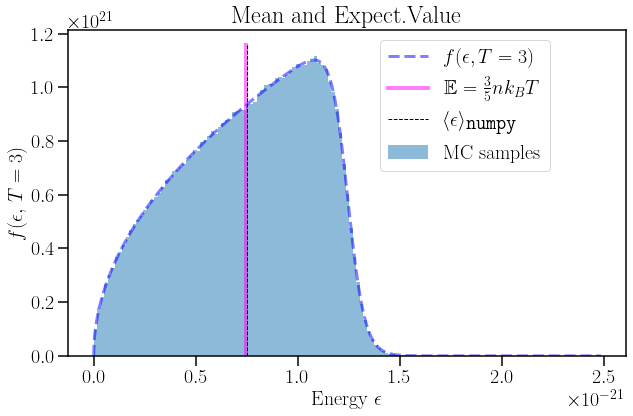

In [17]:
data = Egenerator(1e6, 3)
content,bin_edges, _ = plt.hist(data, density=True, bins = 100, alpha = 0.5, label = "MC samples")
binWidth = (bin_edges[1] - bin_edges[0])
xCoords = bin_edges[:-1] + binWidth/2
#plt.scatter(list(xCoords), np.zeros(len(xCoords)), color = "red", label = "Bin center")

#compute the mean explicitely
mean = np.sum(content*xCoords) *binWidth
m = np.mean(data)


plt.plot(xfunc,yfunc                , "--"  , lw = 3, color = "blue"    , alpha = 0.5   , label = r"$f(\epsilon, T=3)$")
plt.plot([meanTH, meanTH], [0, fmax]        , lw = 4, color = "magenta" , alpha = 0.5   , label = r"$\mathbb{E} = \frac{3}{5}nk_BT$")
plt.plot([m, m], [0, fmax]          , '--'  , lw = 1, color = "black"  , alpha = 1     , label = r"$\langle\epsilon\rangle_{\texttt{numpy}}$")

plt.xlabel("Energy $\epsilon$")
plt.ylabel("$f(\epsilon,\,T=3)$")
plt.legend(bbox_to_anchor=[0.54, 0 ,0,1])
plt.title("Mean and Expect.Value")

#plt.savefig(path+"samples&Means.png")

print("The mean is : " ,mean, " \nThe theoretial mean is : " , ExpVal, "\nThe mean computed with numpy is : ", m)


Compare the means

In [12]:
print("Numpy Mean=\t",m*corrFac/(kb*T))
print("Handmade mean=\t",mean*corrFac/(kb*T))

Numpy Mean=	 17.94343259608042
Handmade mean=	 17.94279719335473


In [13]:
v       = np.var(data)
s       = stats.skew(data)
k       = stats.kurtosis(data)
stdev   = np.sqrt(v)
stdev_APP = stdev

print(" variance\t = ", v ,  "\n std dev\t = ", stdev,"\n skewness\t = ", s , "\n kurtosis\t = ", k)

 variance	 =  1.0857036538771353e-43 
 std dev	 =  3.2950017509511815e-22 
 skewness	 =  -0.291176180666086 
 kurtosis	 =  -0.9104873794986466


# Task 2

a) Take Nexp = 1 and show the law of large numbers based on the data points you generated.

Now we take the data points we managed to get. They are all distributed according to $f$, with a mean of $18\cdot k_B T$ and a variance $var \approx 1.09 \cdot 10^{-43}$

If we want to show the laws of large numbers, we can show that if we progressively compute the mean for a given number of samples ($N_{exp}=1$), then the average will converge to a number, which should be the mean.

In [14]:
N=1e8
data = Egenerator(N,3)
l = len(data)
steps = 500

listAverage = np.zeros(int(N/steps))
for i in range(int(l/steps)):
    moy = np.mean(data[:i+1])
    listAverage[i] = moy
xMean = np.linspace(0,N,int(l/steps))

[]

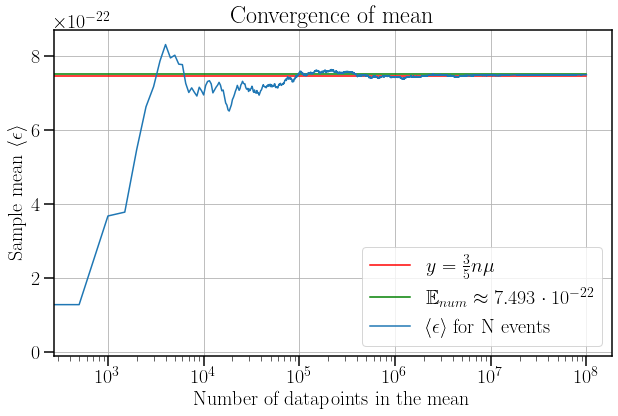

In [15]:
plt.plot([0,N],[(3/5)*30*kb*T,(3/5)*30*kb*T], color = "red", label = r"$y = \frac{3}{5}n\mu$")
plt.plot([0,N],[ExpVal,ExpVal], color = "green", label = r"$\mathbb{E}_{num}\approx 7.493\cdot10^{-22}$")
plt.plot(xMean, listAverage, label = r"$\langle\epsilon\rangle $ for N events ")

plt.title("Convergence of mean")
plt.xlabel("Number of datapoints in the mean")
plt.ylabel(r"Sample mean $\langle\epsilon\rangle$")

plt.legend()
plt.grid()
plt.semilogx()

#plt.savefig(path+"LawOfLargeNumbers.png")

If we take the ratio divided by 18, it converges asymptotically to 1

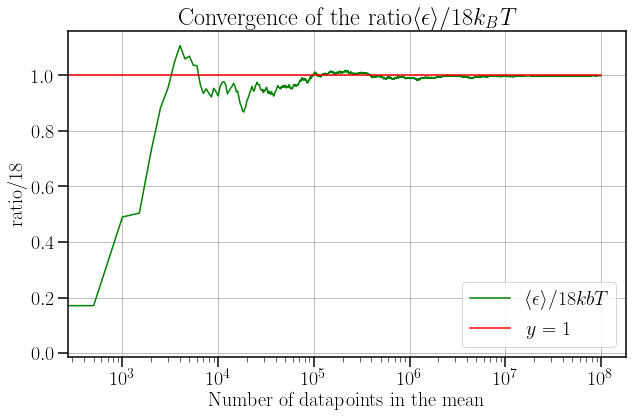

In [16]:
ratio = [listAverage/(ExpVal) for listAverage in listAverage]

plt.plot(xMean, ratio, color = "green", label = r"$\langle\epsilon\rangle/18 kb T$")
plt.plot([0,N],[1,1], color = "red", label = "$y = 1$")

plt.title("Convergence of the ratio"+r"$\langle\epsilon\rangle/18k_BT$")
plt.xlabel("Number of datapoints in the mean")
plt.ylabel("ratio/18")

plt.semilogx()
plt.grid()
plt.legend()

#plt.savefig(path+"ConvRatio.png")

b) Take Nexp >> 1 and show the validity of the central limit theorem for the mean :

We will take a lot of experiment and every time, we will compute the mean and put it in a list

In the end, we put it in a histogram and see if it is a Gaussian.

In [17]:
N   = 1e4
N2  = 500
Nexp= 1e4

k=1
listMean    = []
listVar     = []
listMean2   = []
listVar2    = []
while k<=Nexp :
    dat     = Egenerator(N,3)
    dat2    = Egenerator(N2,3)

    mean    = np.mean(dat)
    var     = np.var(dat)
    mean2   = np.mean(dat2)
    var2    = np.var(dat2)
    listMean.append(mean)
    listVar.append(var)
    listMean2.append(mean2)
    listVar2.append(var2)
    k = k+1

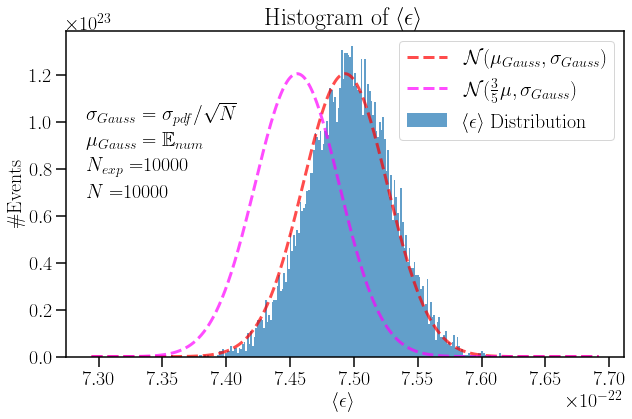

In [18]:
sigmaCLT = np.sqrt(varPDF)/np.sqrt(N)
sigmaCLT2= np.sqrt(varPDF)/np.sqrt(N2)

xplot = np.linspace(ExpVal-6*sigmaCLT, ExpVal+6*sigmaCLT, 1000)
yplot = gauss(xplot, ExpVal, sigmaCLT)
yplot2 = gauss(xplot, meanTH, sigmaCLT)

plt.hist(listMean, density=True, bins = 200  , alpha = 0.7      , label = r"$\langle\epsilon\rangle$ Distribution")

plt.plot(xplot,yplot    , "--"  , color ="red"      , alpha = 0.7 , lw = 3, label = r"$\mathcal{N}(\mu_{Gauss},\sigma_{Gauss})$")
plt.plot(xplot,yplot2   , "--"  , color ="magenta"  , alpha = 0.7 , lw = 3, label = r"$\mathcal{N}(\frac{3}{5}\mu,\sigma_{Gauss})$")

plt.text(meanTH-5*sigmaCLT, 10.1e22 , "$\sigma_{Gauss} = \sigma_{pdf}/\sqrt{N}$"       , horizontalalignment='left')
plt.text(meanTH-5*sigmaCLT, 9e22    , r"$\mu_{Gauss} = \mathbb{E}_{num}$"                      , horizontalalignment='left')
plt.text(meanTH-5*sigmaCLT, 7.9e22  , "$N_{exp}=$"+ str("{:.0f}".format(Nexp))    , horizontalalignment='left')
plt.text(meanTH-5*sigmaCLT, 6.8e22  , '$N=$'+ str("{:.0f}".format(N))             , horizontalalignment='left')

plt.title(r"Histogram of $\langle\epsilon\rangle$" )
plt.xlabel(r"$\langle\epsilon\rangle$")
plt.ylabel(r"\#Events")
plt.legend()

#plt.savefig(path+"CentLimitThm.png")

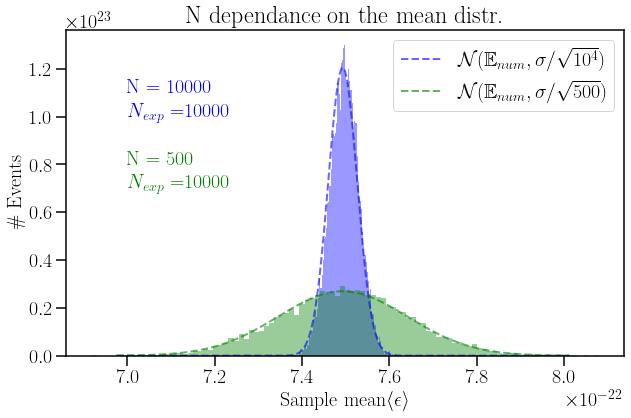

In [19]:
xp = np.linspace(ExpVal-3.5*sigmaCLT2, ExpVal+3.5*sigmaCLT2, 1000)
yp = gauss(xp, ExpVal, sigmaCLT)
yp2= gauss(xp, ExpVal, sigmaCLT2)

plt.hist(listMean   , density=True, bins = 100, color = "blue" , alpha = 0.4)
plt.hist(listMean2  , density=True, bins = 100, color = "green", alpha = 0.4)

plt.plot(xp,yp  , "--", lw = 2, color = "blue"  , alpha = 0.6, label = r"$\mathcal{N}(\mathbb{E}_{num}, \sigma/\sqrt{10^4})$")
plt.plot(xp,yp2 , "--", lw = 2, color = "green" , alpha = 0.6, label = r"$\mathcal{N}(\mathbb{E}_{num}, \sigma/\sqrt{500})$")

plt.text(7e-22  ,1.1e23 , r"N = "+ str("{:.0f}".format(N))              , color = "blue")
plt.text(7e-22  ,1e23   , r"$N_{exp}= $"+ str("{:.0f}".format(Nexp))    , color = "blue")
plt.text(7e-22  ,0.8e23 , r"N = "+ str("{:.0f}".format(N2))             , color = "green")
plt.text(7e-22  ,0.7e23   , r"$N_{exp}= $"+ str("{:.0f}".format(Nexp))  , color = "green")

plt.title("N dependance on the mean distr.")
plt.xlabel("Sample mean" + r"$\langle\epsilon\rangle$")
plt.ylabel("\# Events")
plt.legend()

plt.savefig(path+"CLTNDep.png")

Same but centered

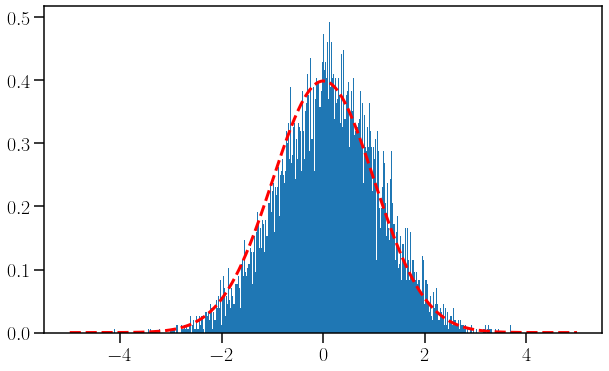

In [20]:
stdDev = np.mean(np.sqrt(listVar))
Z= [(listMean-ExpVal)/(stdDev/np.sqrt(N)) for listMean in listMean]

xTest = np.linspace(-5 , 5 , 1000)
yTest = gauss(xTest, 0, 1)


plt.plot(xTest, yTest, "--", color =  "red", lw = 3)
plt.hist(Z, density = True, bins = 500)

plt.show()

c) Compute the variance of 〈e〉 and compare it with the value you expect.

In [21]:
np.var(listMean)/(sigmaCLT**2)

0.9852722571788475

# Task 3

a) What is the expected p.d.f. for the number of entries per bin?

the number of entries per bin is large => Gaussian with mean $f$. Let's compute the chi2 for one experiment ang generalise later.

Text(0, 0.5, '\\# Events')

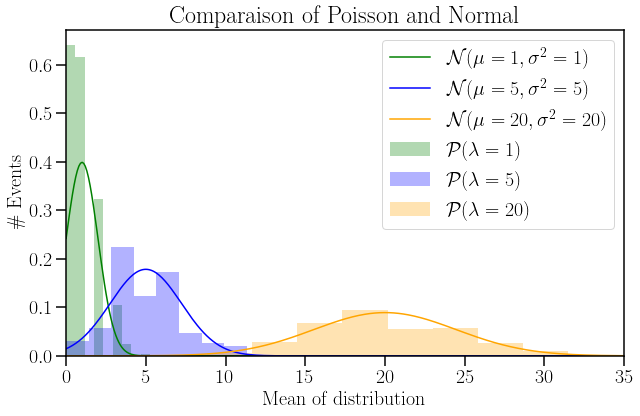

In [22]:
xPoisson = np.linspace(0,40, 400)
plt.hist(np.random.poisson(1,10000) ,alpha = 0.3, color = "green"   , bins = 12  , density= True, label = "$\mathcal{P}(\lambda=1)$")
plt.hist(np.random.poisson(5,10000) ,alpha = 0.3, color = "blue"    , bins = 12  , density= True, label = "$\mathcal{P}(\lambda=5)$")
plt.hist(np.random.poisson(20,10000),alpha = 0.3, color = "orange"  , bins = 12  , density= True, label = "$\mathcal{P}(\lambda=20)$")
plt.plot(xPoisson,gauss(xPoisson,1,np.sqrt(1)), color = "green", label = "$\mathcal{N}(\mu =1, \sigma^2 = 1)$")
plt.plot(xPoisson,gauss(xPoisson,5,np.sqrt(5)), color = "blue", label = "$\mathcal{N}(\mu=5, \sigma^2 = 5)$")
plt.plot(xPoisson,gauss(xPoisson,20,np.sqrt(20)), color = "orange", label = "$\mathcal{N}(\mu=20, \sigma^2 = 20) $")

plt.legend( )
plt.xlim(0,35)
plt.title("Comparaison of Poisson and Normal")
plt.xlabel("Mean of distribution")
plt.ylabel("\# Events")

#plt.savefig(path+"PoissNormal.png")

In [23]:
#Expected value of function at bin number i
def ExpectFunc(edges,Temp):
    fi = np.zeros(len(edges)-1)
    for i in range(len(edges)-1):
        fi[i] = quad(f, edges[i], edges[i+1], args = Temp)[0]
    return fi

45.44656685387013


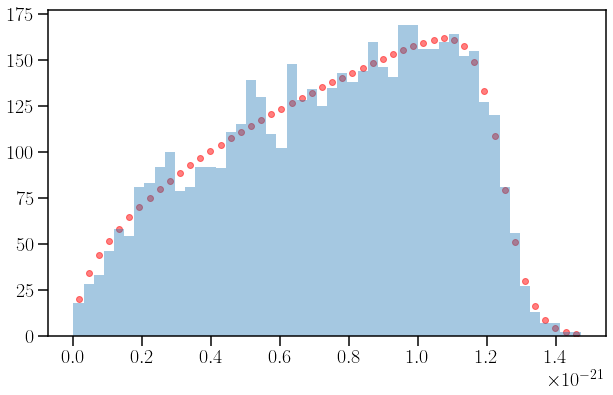

In [24]:
#test code
N=int(5000)
d = Egenerator(N,3)
N_bins = 50

content,edges = np.histogram(d, bins=N_bins)
width = edges[1]-edges[0]
xC = edges[:-1]+width/2

plt.hist(d, bins=N_bins, alpha = 0.4)
plt.scatter(xC,N*ExpectFunc(edges,3), color = "red", alpha = 0.5)

chi2 = 0
fj = N*ExpectFunc(edges,3)
for i in range(len(content)):
    chi2 = chi2 + np.power((content[i]-fj[i]),2)/(fj[i])
    

print(chi2)

Define a function for it

In [25]:
def doChiBin(bin_content,bin_edges):
    chi2 = 0
    fj = N*ExpectFunc(bin_edges,3)
    for i in range(len(bin_content)):
        chi2 =chi2 + np.power((bin_content[i]-fj[i]),2)/(fj[i])
    return chi2

def doChiBinApprox(bin_content,bin_edges):
    width = bin_edges[1]-bin_edges[0]
    xC = bin_edges[:-1]+width/2
    chi2 = 0
    for i in range(len(bin_content)):
        fj = N*f(xC[i], 3)*width
        chi2 =chi2 + np.power((bin_content[i]-fj),2)/(fj)
    return chi2

In [26]:
Nexp    = int(2000)
N       = int(2000)
nBins   = 10
chiList = np.zeros(Nexp)
chiList_approx = np.zeros(Nexp)


for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList[i] =doChiBin(content, edges)
    chiList_approx[i] =doChiBinApprox(content, edges)
chiList = chiList[chiList< 45]
chiList_approx = chiList_approx[chiList_approx< 45]

(0.0, 45.0)

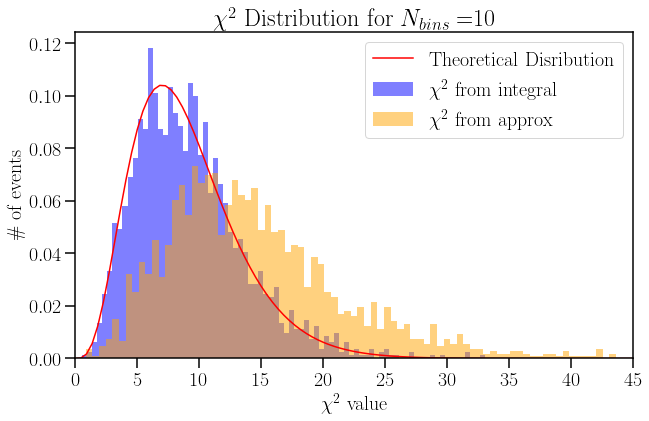

In [27]:
xChi = np.linspace(0,45,100)
yChi = stats.chi2.pdf(xChi, df = nBins-1, scale = 1)

plt.hist(chiList        , density=True, bins = 80, color = "blue"  , alpha = 0.5, label = "$\chi^2$  from integral")
plt.hist(chiList_approx , density=True, bins = 80, color = "orange", alpha = 0.5, label = "$\chi^2$  from approx")
plt.plot(xChi,yChi, color = "red", label = "Theoretical Disribution")

plt.title("$\chi^2$ Distribution for $N_{bins} = $" +str("{:.0f}".format(nBins)))
plt.xlabel("$\chi^2$ value")
plt.ylabel("\# of events")

plt.legend()
plt.xlim(0,45)

#plt.savefig(path+"chi2.png")

In [28]:
Nexp=2000
N=2000
chiList1 = np.zeros(Nexp)
chiList2 = np.zeros(Nexp)
chiList3 = np.zeros(Nexp)
chiList4 = np.zeros(Nexp)

nBins = 5
for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList1[i] =doChiBin(content, edges)
chiList1 = chiList1[chiList1< 50]

nBins = 10
for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList2[i] =doChiBin(content, edges)
chiList2 = chiList2[chiList2< 50]

nBins = 15
for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList3[i] =doChiBin(content, edges)
chiList3 = chiList3[chiList3< 50]

nBins = 25
for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList4[i] =doChiBin(content, edges)
chiList4 = chiList4[chiList4< 50]

Text(0, 0.5, '\\# of events')

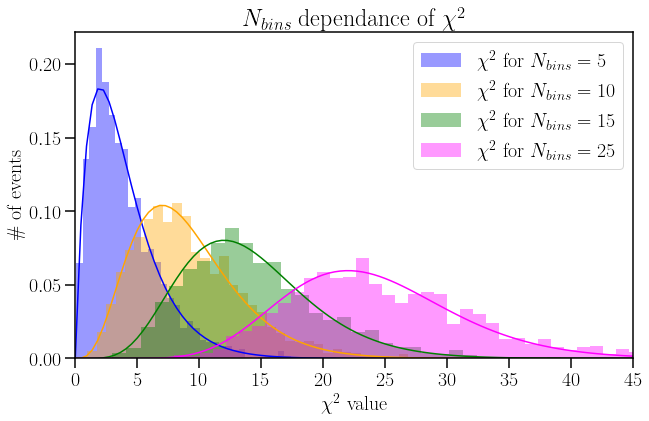

In [29]:
plt.hist(chiList1, density = True, bins = 40, alpha = 0.4, color = "blue"     , label = "$\chi^2$ for $N_{bins}=5$")
plt.hist(chiList2, density = True, bins = 40, alpha = 0.4, color = "orange"   , label = "$\chi^2$ for $N_{bins}=10$")
plt.hist(chiList3, density = True, bins = 40, alpha = 0.4, color = "green"    , label = "$\chi^2$ for $N_{bins}=15$")
plt.hist(chiList4, density = True, bins = 40, alpha = 0.4, color = "magenta"  , label = "$\chi^2$ for $N_{bins}=25$")

xChi = np.linspace(0,45,100)
yChi1 = stats.chi2.pdf(xChi,4)
yChi2 = stats.chi2.pdf(xChi,9)
yChi3 = stats.chi2.pdf(xChi,14)
yChi4 = stats.chi2.pdf(xChi,24)
plt.xlim(0,45)

plt.plot(xChi,yChi1, color = "blue")
plt.plot(xChi,yChi2, color = "orange")
plt.plot(xChi,yChi3, color = "green")
plt.plot(xChi,yChi4, color = "magenta")

plt.legend()
plt.title("$N_{bins}$ dependance of $\chi^2$")
plt.xlabel("$\chi^2$ value")
plt.ylabel("\# of events")

#plt.savefig(path+"chi2BINS.png")

# Task 4

a) Compute the log likelihood ln L(x1, x2, ..., xN | μ) at a given μ. Then, use the maximum
likelihood method to estimate μ and its variance

In [30]:
N       = int(5000)
N2      = int(500)
Nexp    = int(5000)
nBins   = 20
data    = Egenerator(N,T)
Ttest   = np.linspace(0.5,7,500)
DoComputation = True

In [31]:
def LLH(data, par):
    return -np.log(f(data,par)).sum()

LLH(data,3)

-240622.63079926616

In [32]:
listLikeliHood = np.zeros(len(Ttest))
listLikeliHood_Plot = np.zeros(len(Ttest))

for i in range(len(Ttest)):
    l = LLH(data,Ttest[i])
    listLikeliHood[i] = l
    listLikeliHood_Plot[i] = l

Lmin = min(listLikeliHood)
indexLmin = (listLikeliHood.tolist()).index(Lmin)

for i in range(len(Ttest)): #Normalize
    listLikeliHood_Plot[i] -= Lmin

TParam = Ttest[indexLmin]

i1=0
i2=0
for i in range(0,len(Ttest)-1):
    if listLikeliHood_Plot[i]>0.5 and listLikeliHood_Plot[i+1]<0.5:
        i1=i
    if listLikeliHood_Plot[i]<0.5 and listLikeliHood_Plot[i+1]>0.5:
        i2=i

err = (Ttest[i2]-Ttest[i1])/2

print ("T= ", TParam, "+-", err)
print("mu = " , str("{:.2f}".format(30*kb*Ttest[indexLmin]*1e23)), "+-",str("{:.2f}".format(30*kb*err*1e23)) )
print("Expected result : ",  str("{:.2f}".format(1e23*meanTH/((3/5)))))

T=  3.001002004008016 +- 0.013026052104208485
mu =  124.30 +- 0.54
Expected result :  124.26


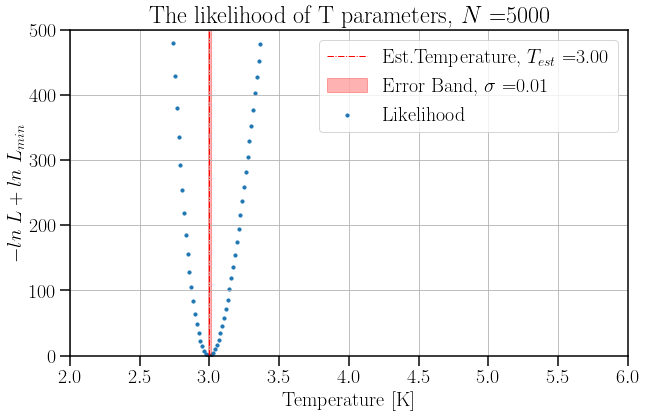

In [33]:
plt.scatter(Ttest,listLikeliHood_Plot, s=10, label = "Likelihood")
plt.fill([TParam-err,TParam-err,TParam+err,TParam+err],[0,1000,1000,0], color = "red", alpha = 0.3, label="Error Band, $\sigma=$"+str("{:.2f}".format(err)))
plt.plot([TParam,TParam],[0,1000], "-.", lw=1, color = "red", label = "Est.Temperature, $T_{est}=$"+ str("{:.2f}".format(Ttest[indexLmin])))

plt.title("The likelihood of T parameters, $N=$"+str(N))
plt.xlabel("Temperature [K]")
plt.ylabel("$-ln\ L+ln\ L_{min}$")

plt.grid(True)
plt.xlim(2,6)
plt.ylim(0,500)
plt.legend()

#plt.savefig(path+"LLH.png")


Same code but with auto minimizing

In [34]:
dat = data

minimPar    = minimize_scalar(lambda x: LLH(dat,x), bounds = (0.5,7), method="bounded")
errPos      = minimize_scalar(lambda ep :( abs(LLH(dat,ep+minimPar.x)-minimPar.fun-0.5) ) , bounds=(0,1), method="bounded")
errMin      = minimize_scalar(lambda em :( abs(LLH(dat,em+minimPar.x)-minimPar.fun-0.5) ), bounds=(-1,0), method="bounded")
err         = (abs(errPos.x)+abs(errMin.x))/2

print("TMin = " , minimPar.x, "error =", err)

TMin =  2.9975580627122693 error = 0.009380344199689142


In [35]:
result_LLH   = np.zeros(Nexp)
std_LLH      = np.zeros(Nexp)
result_LLH2  = np.zeros(Nexp)
std_LLH2     = np.zeros(Nexp)

for i in range(Nexp):
    
    dat             = Egenerator(N,3)
    dat2            = Egenerator(N2,3)

    minimPar        = minimize_scalar(lambda x  : LLH(dat,x)                                        , bounds = (0.5,7)  , method="bounded")
    errPos          = minimize_scalar(lambda ep :( abs(LLH(dat,ep+minimPar.x)-minimPar.fun-0.5) )   , bounds=(0,1)      , method="bounded")
    errMin          = minimize_scalar(lambda ep :( abs(LLH(dat,-ep+minimPar.x)-minimPar.fun-0.5) )  , bounds=(-1,0)     , method="bounded")
    err             = (abs(errPos.x)+abs(errMin.x))/2

    minimPar2       = minimize_scalar(lambda x  : LLH(dat2,x)                                        , bounds = (0.5,7) , method="bounded")
    errPos2         = minimize_scalar(lambda ep :( abs(LLH(dat2,ep+minimPar2.x)-minimPar2.fun-0.5) ) , bounds=(0,1)     , method="bounded")
    errMin2         = minimize_scalar(lambda ep :( abs(LLH(dat2,-ep+minimPar2.x)-minimPar2.fun-0.5) ), bounds=(-1,0)    , method="bounded")
    err2            = (abs(errPos2.x)+abs(errMin2.x))/2

    result_LLH[i]    = minimPar.x
    std_LLH[i]       = err
    result_LLH2[i]   = minimPar2.x
    std_LLH2[i]      = err2


Mean 1	 = 2.999696391890994 
Mean 2	 = 2.997707952776203


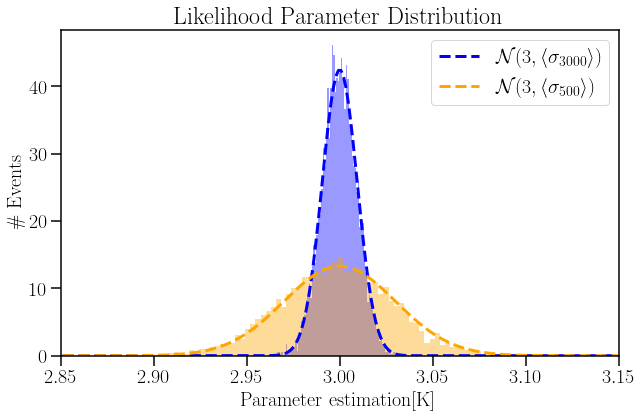

In [36]:
x = np.linspace(2.8,3.2,300)
y = gauss(x,3,np.mean(std_LLH))
y2 = gauss(x,3,np.mean(std_LLH2))

plt.hist(result_LLH  , bins = 80, density=True, color = "blue"   , alpha = 0.4)
plt.hist(result_LLH2 , bins = 80, density=True, color = "orange" , alpha = 0.4)

plt.plot(x,y, "--", lw=3, color = "blue"   , label = r"$\mathcal{N}(3,\langle\sigma_{3000}\rangle)$")
plt.plot(x,y2,"--", lw=3, color = "orange" , label = r"$\mathcal{N}(3,\langle\sigma_{500}\rangle)$")

plt.title("Likelihood Parameter Distribution")
plt.xlabel("Parameter estimation[K]")
plt.ylabel("\# Events")
plt.xlim(2.85,3.15)

plt.legend()
#plt.savefig(path+"LLHDist.png")


print("Mean 1\t =", np.mean(result_LLH)
    , "\nMean 2\t =", np.mean(result_LLH2))

In [37]:
if(DoComputation):
    result_LLH0  = np.zeros(Nexp)
    std_LLH0    = np.zeros(Nexp)

    for i in range(Nexp):
        dat = Egenerator(N,T)
        listLikeliHood = np.zeros(len(Ttest))

        for j in range(len(Ttest)):
            l = LLH(dat,Ttest[j])
            listLikeliHood[j] = l

        Lmin = min(listLikeliHood)
        indexLmin = (listLikeliHood.tolist()).index(Lmin)
        TParam = Ttest[indexLmin]
        result_LLH0[i] = TParam
        
        i1=0
        i2=0
        for l in range(0,len(Ttest)-1):
            if listLikeliHood[l]>0.5+Lmin and listLikeliHood[l+1]<0.5+Lmin:
                i1=l
            if listLikeliHood[l]<0.5+Lmin and listLikeliHood[l+1]>0.5+Lmin:
                i2=l
        err = (Ttest[i2]-Ttest[i1])/2
        std_LLH0[i] = err

Mean of Distr (N = 5000 ) =  2.999696391890994 0.999898797296998
Mean of Distr (N = 500 ) =  2.997707952776203 0.9992359842587343


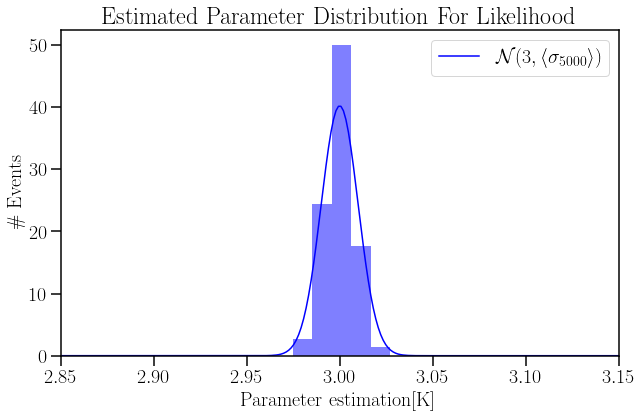

In [38]:
if(DoComputation):
    x = np.linspace(2.8,3.2,300)
    y = gauss(x,3,np.mean(std_LLH0))

    plt.hist(result_LLH0 , bins = 5, density=True, color = "blue"    , alpha = 0.5)
    plt.plot(x,y    , color = "blue"    , label = r"$\mathcal{N}(3,\langle\sigma_{5000}\rangle)$")

    plt.title("Estimated Parameter Distribution For Likelihood")
    plt.xlabel("Parameter estimation[K]")
    plt.ylabel("\# Events")
    plt.xlim(2.85,3.15)
    plt.legend()

    print("Mean of Distr (N = " +str(N) ,") = ",  np.mean(result_LLH),np.mean(result_LLH)/3)
    print("Mean of Distr (N = " +str(N2) ,") = ",  np.mean(result_LLH2),np.mean(result_LLH2)/3)

Compare minimizer and handmade method

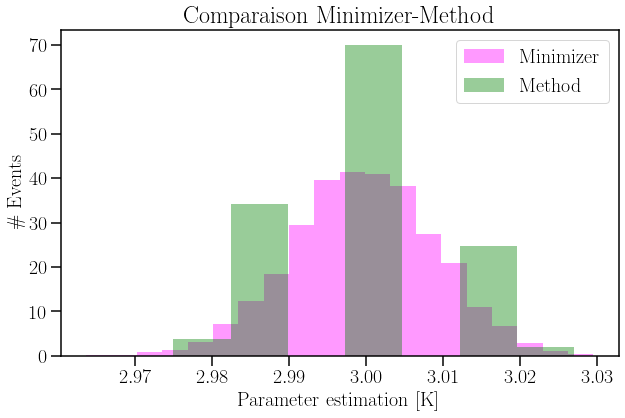

In [39]:
if(DoComputation):
    plt.hist(result_LLH , density=True, color = "magenta", alpha = 0.4, bins = 20, label="Minimizer")
    plt.hist(result_LLH0, density=True, color = "green"  , alpha = 0.4, bins = 7, label="Method")

    plt.title("Comparaison Minimizer-Method")
    plt.xlabel("Parameter estimation [K]")
    plt.ylabel("\# Events")
    plt.legend()

    #plt.savefig(path+"LLHComp.png")

To compute the p-Value

The p-value of the estimation before is : 53.46%


<ipython-input-40-4b45d2b266b5>:2: RuntimeWarning: overflow encountered in exp
  Lmax = np.exp(-LLH(data, Ttest[indexLmin]))


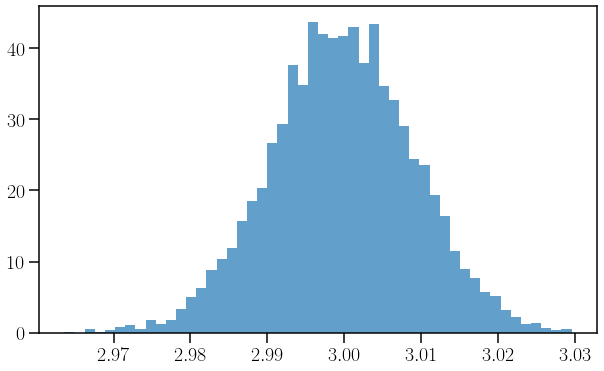

In [40]:
cont,edg,_= plt.hist(result_LLH, bins = 50, density = True, alpha = 0.7)
Lmax = np.exp(-LLH(data, Ttest[indexLmin]))
plt.plot([Lmax,Lmax],[0,30], lw = 3)

w=edg[1]-edg[0]
edgSum = edg[edg<Ttest[indexLmin]][1:]
pVal = np.sum(cont[:len(edgSum)])*w
print("The p-value of the estimation before is : "+str("{:.2f}".format(pVal*100)) + "%")


b) Compute the goodness of fit at various μ and use the least squares method to estimate μ
and its variance.

Let's now define a list of different $\mu$  and for each one of them compute the least squares : 

$$
X = \sum (\dfrac{y(\epsilon)-f(\epsilon, T)}{\sigma})^2
$$

In [41]:
def LeastSquare(data, nBins, params):

    content,edges = np.histogram(data, bins = nBins, density=False)
    yerr = np.sqrt(content)
    listX2 =  []

    for j in range(len(params)):
        c=0
        fj = N*ExpectFunc(edges,params[j])
        for i in range(len(content)):
            if(content[i]==0):
                dif=0
            else:
                dif = np.power((content[i]-fj[i])/(yerr[i]),2)
                c+=dif
        listX2.append(c)
    return listX2

def LS(data, nBins, param):

    content,edges = np.histogram(data, bins = nBins, density=False)
    yerr = np.sqrt(content)

    chi2 = 0
    fj = N*ExpectFunc(edges,param)
    for i in range(len(content)):
        if(content[i]==0):
            dif=0
        else:
            dif = np.power((content[i]-fj[i])/(yerr[i]),2)
            chi2+=dif
    return chi2

In [42]:
d = Egenerator(N,T)
d2 = Egenerator(N2,T)
d3 = Egenerator(2000,T)
yLS = np.zeros(len(Ttest))
yLS1 = np.zeros(len(Ttest))
yLS2 = np.zeros(len(Ttest))
yLS3 = np.zeros(len(Ttest))

for i in range(len(Ttest)):
    yLS[i] = LS(d, nBins, Ttest[i])
    yLS1[i] = LS(d, 2*nBins, Ttest[i])
    yLS2[i] = LS(d2, nBins, Ttest[i])
    yLS3[i] = LS(d3, nBins, Ttest[i])

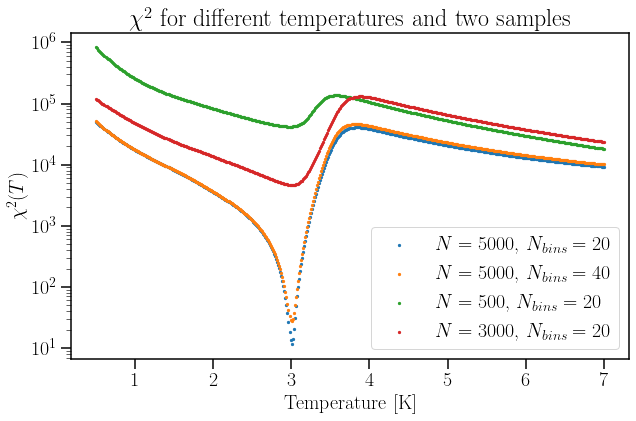

In [43]:
plt.scatter(Ttest, yLS    , s = 5, label = r"$N=5000$,"+"\t"+r"$N_{bins}=20$" )
plt.scatter(Ttest, yLS1   , s = 5, label = r"$N=5000$,"+"\t"+r"$N_{bins}=40$" )
plt.scatter(Ttest, yLS2    , s = 5, label = r"$N=500$,"+"\t"+r"$N_{bins}=20$" )
plt.scatter(Ttest, yLS3   , s = 5, label = r"$N=3000$,"+"\t"+r"$N_{bins}=20$" )
plt.semilogy()

plt.title("$\chi^2$ for different temperatures and two samples")
plt.xlabel("Temperature [K]")
plt.ylabel("$\chi^2 (T)$")
plt.legend()

plt.savefig(path+"X2NDiff.png")

In [44]:
listBins = list(range(10,100, 5))
listTimes = []
listPar =[]

for i in range(len(listBins)):
    t0 = time.time()
    xL = []
    xL = LeastSquare(data, listBins[i], Ttest)
    t1 = time.time() -t0
    listTimes.append(t1)
    mP = Ttest[xL.index(min(xL))]
    listPar.append(mP)

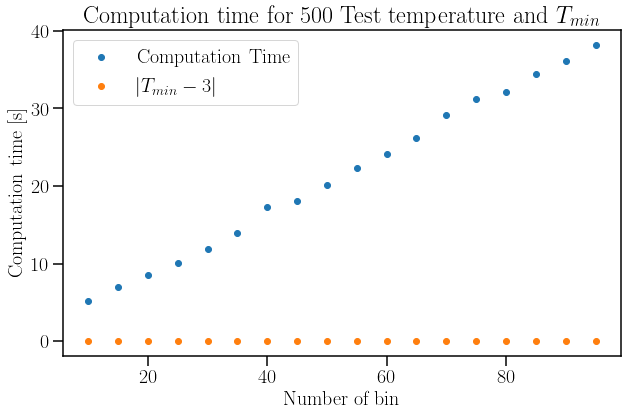

In [45]:
plt.scatter(listBins, listTimes, label = "Computation Time")
plt.scatter(listBins,[listPar-3 for listPar in listPar] , label = "$|T_{min}-3|$")

plt.title("Computation time for "+str(len(Ttest)) +" Test temperature and $T_{min}$")
plt.xlabel("Number of bin")
plt.ylabel("Computation time [s]")
plt.legend()

#plt.savefig(path+"CompTime.png")

In [46]:
x2List = LeastSquare(data, nBins, Ttest)
jmin = x2List.index(min(x2List))
x2Min = x2List[jmin]
parMin = Ttest[jmin]

for i in range(len(x2List)):
    x2List[i] = x2List[i]-x2Min

j1=0
j2=0
for i in range(len(Ttest)-1):
    if x2List[i]>1 and x2List[i+1]<1:
        j1=i
    if x2List[i]<1 and x2List[i+1]>1:
        j2=i

err = (Ttest[j2]-Ttest[j1])/2


mu =  124.30 +- 0.27
Expected result :  124.26


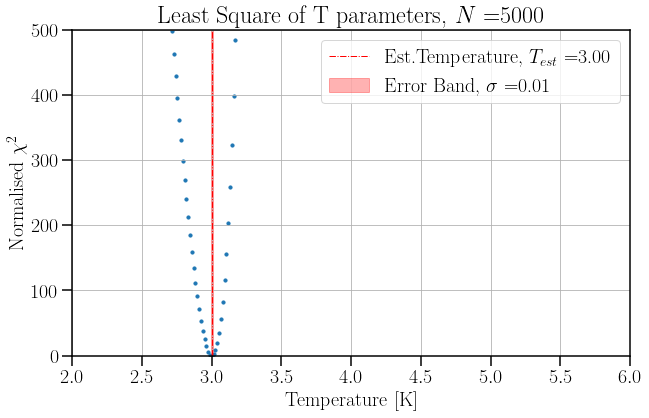

In [47]:
plt.scatter(Ttest, x2List, s=10)

plt.fill([parMin-err,parMin-err,parMin+err,parMin+err], [0,500,500,0], color = "red", alpha = 0.3, label="Error Band, $\sigma=$"+str("{:.2f}".format(err)))
plt.plot([parMin,parMin],[0,500], "-.", lw = 1, color = "red", label = "Est.Temperature, $T_{est}=$"+ str("{:.2f}".format(Ttest[indexLmin])) )

plt.title("Least Square of T parameters, $N=$"+str(N))
plt.xlabel("Temperature [K]")
plt.ylabel("Normalised $\chi^2$")
plt.legend()
plt.ylim(0,500)
plt.xlim(2,6)
plt.grid()

#plt.savefig(path+"LeastSquares.png")

print("mu = " , str("{:.2f}".format(30*kb*parMin*1e23)), "+-",str("{:.2f}".format(30*kb*err*1e23)) )
print("Expected result : ",  str("{:.2f}".format(mu*1e23)))

In [48]:
dat     = Egenerator(3000,3)
minimPar= minimize_scalar(lambda x: LS(dat, nBins, x), [3] ,bounds = (0.5,6), method = "bounded")
errPos  = minimize_scalar(lambda ep :( abs(LS(dat,nBins,ep+minimPar.x)-minimPar.fun-1) ) , bounds=(0,1), method = "bounded")
errMin  = minimize_scalar(lambda ep :( abs(LS(dat,nBins,-ep+minimPar.x)-minimPar.fun-1) ), bounds=(-1,0), method = "bounded")
err     = (abs(errPos.x)+abs(errMin.x))/2
print(minimPar.x, err)

2.9760384984978776 0.006758092494902243


In [49]:
result_x22 = np.zeros(Nexp)
std_x22    = np.zeros(Nexp)
result_x21 = np.zeros(Nexp)
std_x21    = np.zeros(Nexp)
t          = []

for i in range(Nexp):
    t0      =time.time()
    dat     = Egenerator(N,3)
    minimPar= minimize_scalar(lambda x  : LS(dat, nBins, x), [1]                            , bounds = (0.5,7)  , method = "bounded")
    errPos  = minimize_scalar(lambda ep :( abs(LS(dat,nBins,ep+minimPar.x)-minimPar.fun-1) ), bounds = (0,1)    , method = "bounded")
    errMin  = minimize_scalar(lambda ep :( abs(LS(dat,nBins,-ep+minimPar.x)-minimPar.fun-1)), bounds = (-1,0)   , method = "bounded")
    err     = (abs(errPos.x)+abs(errMin.x))/2
    result_x21[i]   = minimPar.x
    std_x21[i]      = err
    t.append(time.time()-t0)
    if(i==10):
        print(" Time for 1 loop is approx:", np.mean(t)
            , "\n Comp is finished in ", np.mean(t)*Nexp, "s"
            , " = " , np.mean(t)*Nexp/60 , "min" )

t = []
for i in range(Nexp):
    t0      =time.time()
    dat     = Egenerator(N2,3)
    minimPar= minimize_scalar(lambda x  : LS(dat, nBins, x), [1]                            , bounds = (0.5,7)  , method = "bounded")
    errPos  = minimize_scalar(lambda ep :( abs(LS(dat,nBins,ep+minimPar.x)-minimPar.fun-1)) , bounds = (0,1)    , method = "bounded")
    errMin  = minimize_scalar(lambda ep :( abs(LS(dat,nBins,-ep+minimPar.x)-minimPar.fun-1)), bounds = (-1,0)   , method = "bounded")
    err     = (abs(errPos.x)+abs(errMin.x))/2
    result_x22[i]   = minimPar.x
    std_x22[i]      = err
    t.append(time.time()-t0)
    if(i==10):
        print(" Time for 1 loop is approx:", np.mean(t)
            , "\n Comp is finished in ", np.mean(t)*Nexp, "s"
            , " = " , np.mean(t)*Nexp/60 , "min" )

 Time for 1 loop is approx: 1.0334882952950217 
 Comp is finished in  5167.441476475109 s  =  86.12402460791849 min
 Time for 1 loop is approx: 1.1561193466186523 
 Comp is finished in  5780.596733093262 s  =  96.3432788848877 min


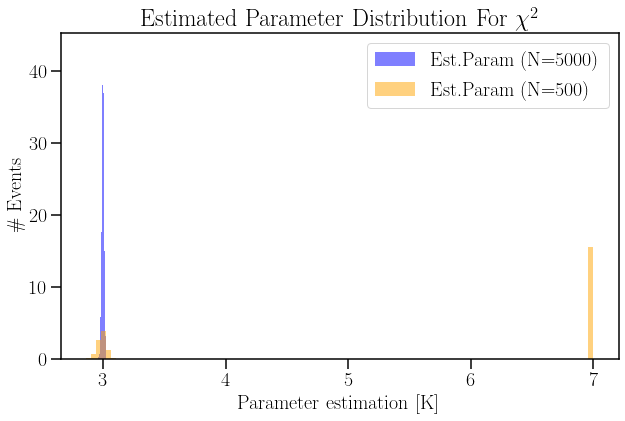

In [50]:
plt.hist(result_x21, bins = 50, density=True, alpha = 0.5 , color = "blue"  , label="Est.Param (N=5000)")
c,e,d = plt.hist(result_x22, bins = 100, density=True, alpha = 0.5 , color = "orange", label="Est.Param (N=500)")

plt.title("Estimated Parameter Distribution For $\chi^2$")
plt.xlabel("Parameter estimation [K]")
plt.ylabel("\# Events")
plt.legend()

Mean =  2.9992839906303255 0.9997613302101085
Mean =  5.578179919483248 1.8593933064944161


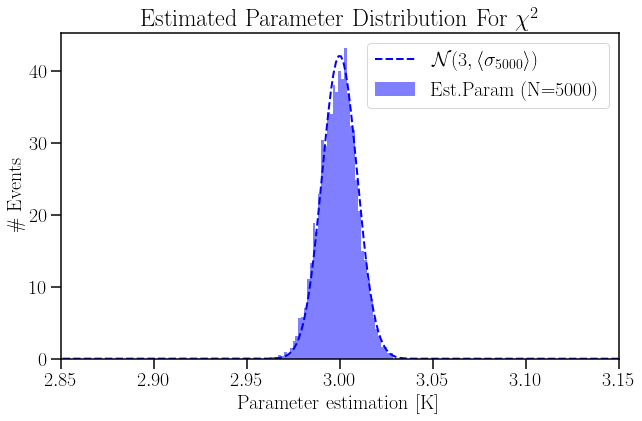

In [51]:
x = np.linspace(2.8,3.2,300)
y = gauss(x,3,np.mean(std_x21))
#y2 = gauss(x,3,np.mean(std_x22))

result_x21 = result_x21[result_x21<10]
result_x22 = result_x22[result_x22<10]

plt.hist(result_x21, bins = 50, density=True, alpha = 0.5 , color = "blue"  , label="Est.Param (N=5000)")
#plt.hist(result_x22, bins = 100, density=True, alpha = 0.5 , color = "orange", label="Est.Param (N=500)")
plt.plot(x,y, "--", lw=2, color = "blue"    , label = r"$\mathcal{N}(3,\langle\sigma_{5000}\rangle)$")
#plt.plot(x,y2, "--", lw=2,  color = "orange"  , label = r"$\mathcal{N}(3,\langle\sigma_{500}\rangle)$")
plt.xlim(2.85,3.15)

plt.xlabel("Parameter estimation [K]")
plt.ylabel("\# Events")
plt.title("Estimated Parameter Distribution For $\chi^2$")
plt.legend()

#plt.savefig(path+"LSDist.png")

print("Mean = ", np.mean(result_x21), np.mean(result_x21)/3)
print("Mean = ", np.mean(result_x22), np.mean(result_x22)/3)

c) The parameter μ can also be estimated by computing the sample mean 〈e〉 of Eq. (1) with
the MC integral. Perform this estimation of μ and its corresponding variance.

We use : (x_i distriuted as f, energy)

$$
E_f(x)= \int_0^{2\mu} x\cdot f(x) dx \approx \dfrac{1}{N}\sum_{i=1}^N h(x_i)
$$

T = 2.99 +- 0.02
mu = 123.93 +- 0.78


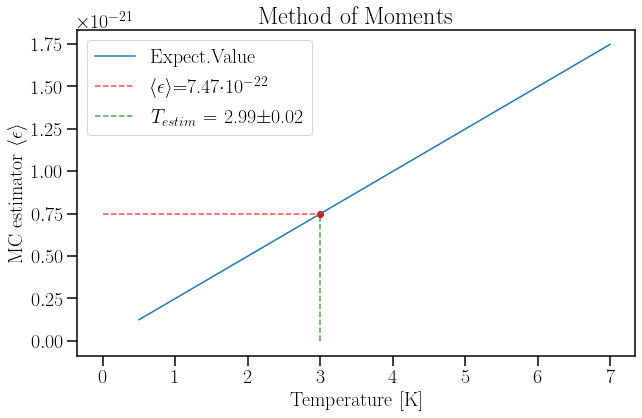

In [52]:
dat     = data
MC_est  = (1/N)*np.sum(dat)
MC_var  = (1/N)*np.sum(np.power(dat,2))-np.power(MC_est,2)
MC_std  = np.sqrt(MC_var)/np.sqrt(N)

#linear relation between exp.val and Temp
E_T     = delta*Ttest

T_est   = MC_est/delta
T_std   = MC_std/delta
mu_est  = MC_est/gamma
mu_std  = MC_std/gamma

plt.plot(Ttest,E_T, label = "Expect.Value")
plt.plot([0,T_est]      ,[MC_est,MC_est], "--"  , color = "red"     , alpha = 0.7, label = r"$\langle\epsilon\rangle$="+str("{:.2f}".format(MC_est*1e22))+"$\cdot 10^{-22}$")
plt.plot([T_est,T_est]  ,[0,MC_est]     , "--"  , color = "green"   , alpha = 0.7, label = r"$T_{estim}$ =  "+str("{:.2f}".format(T_est))+"$\pm$"+str("{:.2f}".format(T_std)))

plt.scatter(T_est, delta*T_est        , color = "red")

plt.title("Method of Moments")
plt.xlabel("Temperature [K]")
plt.ylabel(r"MC estimator $\langle\epsilon\rangle$")

plt.legend()

#plt.savefig(path+"MethodOfMoments.png")


print("T = "  +str("{:.2f}".format(T_est))        + " +- " +str("{:.2f}".format(T_std)))
print("mu = " +str("{:.2f}".format(mu_est*1e23)) + " +- " +str("{:.2f}".format(mu_std*1e23)))

In [53]:
result_Mom      = np.zeros(Nexp)
std_Mom         = np.zeros(Nexp)
result_Mom_wr   = np.zeros(Nexp)
std_Mom_wr      = np.zeros(Nexp)
for i in range(Nexp):
    dat     = Egenerator(N,T)
    MC_est   = (1/N)*np.sum(dat)
    MC_var   = (1/N)*np.sum(np.power(dat,2))-np.power(MC_est,2)
    MC_std   = np.sqrt(MC_var)/np.sqrt(N)

    #Redefine parameter !

    T_est   = MC_est/delta
    T_std   = MC_std/delta
    T_est_wr     = ((5)/(3*30*kb))*MC_est
    T_std_wr    = ((5)/(3*30*kb))*MC_std
    result_Mom[i] = T_est
    std_Mom[i] = T_std
    result_Mom_wr[i] = T_est_wr
    std_Mom_wr[i] = T_std_wr

Mean =  3.0013276252443077


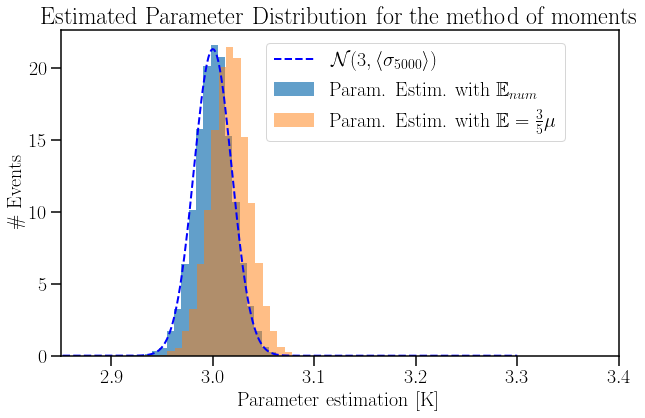

In [54]:
x = np.linspace(2.6,3.3,500)
y = gauss(x,3,np.mean(std_Mom))

plt.hist(result_Mom      , bins = 20, density=True, alpha = 0.7, label = "Param. Estim. with "+r"$\mathbb{E}_{num}$")
plt.hist(result_Mom_wr   , bins = 20, density=True, alpha = 0.5, label = "Param. Estim. with "+r"$\mathbb{E}=\frac{3}{5}\mu$")

plt.plot(x,y, "--", lw = 2, color = "blue"   , label = r"$\mathcal{N}(3,\langle\sigma_{5000}\rangle)$")
plt.xlim(2.85,3.4)

plt.title("Estimated Parameter Distribution for the method of moments")
plt.xlabel("Parameter estimation [K]")
plt.ylabel("\# Events")
plt.legend(bbox_to_anchor=(0.35,0.99))

#plt.savefig(path+"MomentDist.png")

print("Mean = ", np.mean(result_Mom))

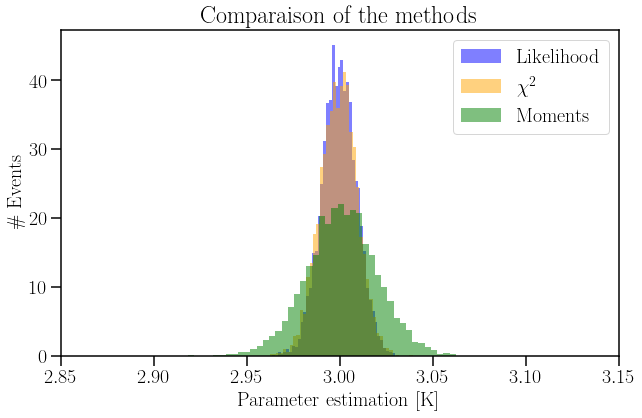

In [55]:
c1,_,_=plt.hist(result_LLH, density=True, color="blue"   , alpha=0.5, bins=43, label="Likelihood")
c2,_,_=plt.hist(result_x21 , density=True, color="orange"  , alpha=0.5, bins=43, label=r"$\chi^2$")
c3,_,_=plt.hist(result_Mom , density=True, color="green"   , alpha=0.5, bins=43, label="Moments")

plt.title("Comparaison of the methods")
plt.xlabel("Parameter estimation [K]")
plt.ylabel("\# Events")

plt.savefig(path+"MethodComp.png")

plt.xlim(2.85,3.15)
plt.legend()

# Task 5 

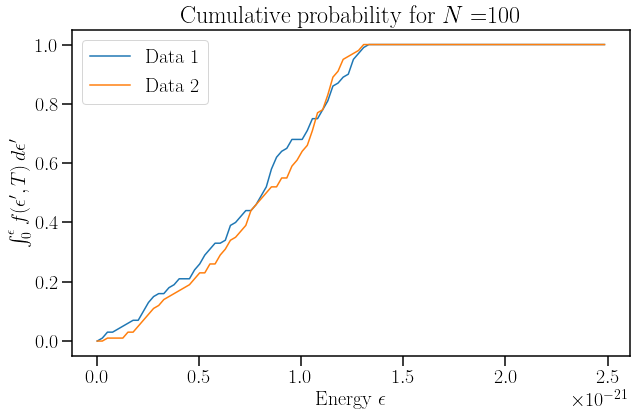

In [56]:
N=1e2
data_1 = np.sort(Egenerator(N,3))  #Generate the data and sort it.
data_2 = np.sort(Egenerator(N,3))

x = np.linspace(0,2*mu,len(data_1))


# Compute the cumulative function using scipy "percentileofscore"
data_1_cum = [stats.percentileofscore(data_1, i)/100 for i in x]
data_2_cum = [stats.percentileofscore(data_2, i)/100 for i in x]
#print('data_2_cum:\n{}'.format(data_2_cum))
#print(20*'-')

plt.plot(x,data_1_cum, label = "Data 1")
plt.plot(x,data_2_cum, label = "Data 2")

plt.title("Cumulative probability for $N=$"+str(int(N)))
plt.xlabel("Energy $\epsilon$")
plt.ylabel("$\int_0^{\epsilon} f(\epsilon',T) \,d\epsilon'$")
plt.legend()

#plt.savefig(path+"cumulative.png")

In [57]:
# Compute the max absolute difference : 

data_diff = np.abs(np.subtract(data_1_cum, data_2_cum))
max_diff = max(data_diff)

# Trying to use directly the 2-sample Kolmogorov test from scipy.stats:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
# https://stackoverflow.com/questions/39132469/how-to-interpret-scipy-stats-kstest-and-ks-2samp-to-evaluate-fit-of-data-t?rq=1

D_statistics, p_value = stats.ks_2samp(data_1,data_2) #D_statistics is the absolute max distance between the two samples

print("Computed Max Dist\t = "  ,  max_diff
    ,"\nComputed from Libr\t = ", D_statistics)

Computed Max Dist	 =  0.09999999999999998 
Computed from Libr	 =  0.11


In [58]:
#The different values of \alpha and their c(\alpha)

alpha = [0.20, 0.15, 0.10, 0.05, 0.025, 0.01, 0.005, 0.001]
c_alpha = [1.073, 1.138, 1.224, 1.358, 1.628, 1.731, 1.949]

crit_value = []
for i in range(len(alpha)):
    crit = np.sqrt(-math.log(alpha[i]/2)*1/N)
    crit_value.append(np.round(crit,3))

crit_value2 = []
for i in range(len(c_alpha)):
    crit_value2.append(c_alpha[i] * np.sqrt(2/N))

print(crit_value)
print(crit_value2)

[0.152, 0.161, 0.173, 0.192, 0.209, 0.23, 0.245, 0.276]
[0.1517451152426331, 0.1609375033980582, 0.17309974003446682, 0.19205020177026633, 0.23023396795433987, 0.24480036764678276, 0.2756302233065162]


In [59]:
index = 3
if D_statistics > crit_value[index]:
    print('The null hypothesis is rejected at the level:\n{}'.format(alpha[index]))
else : 
    print('We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:\n{}'.format(alpha[index]))

We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.05


In [60]:
# Generalizing for Nexp = 100
N=1000
N_exp = 1e2
i = 1
max_dist =[]
pList = []

while i <= N_exp :     
    data_1 = np.sort(Egenerator(N,3))
    data_2 = np.sort(Egenerator(N,3))    
    D_stat, p_value = stats.ks_2samp(data_1, data_2)
    max_dist.append(D_stat)    
    pList.append(p_value)
    i = i+1

In [61]:
# We can compare each of the D_stat value (for each exp) with the 95% confidence level (obtained by using the function we defined before):
# We use the percentileofscore function to see how many (in percentage) are below this value :

print('Crit value for alpha = 0.05 is :\n{}'.format(crit_value[3]))
percentile = stats.percentileofscore(max_dist, crit_value[3])

print('There are', percentile, "% of d <= crit_value : which means that in",percentile , "% of the cases, we cannot reject the null hypothesis that the two datasets originate from the same distribution, at confidence level 95%.")

Crit value for alpha = 0.05 is :
0.192
There are 100.0 % of d <= crit_value : which means that in 100.0 % of the cases, we cannot reject the null hypothesis that the two datasets originate from the same distribution, at confidence level 95%.


# Task 6

In [62]:
N           = int(5000)
N2          = int(500)
Nexp        = int(5000)
nBins       = 20
data6       = Egenerator(N, T)
measured    = np.zeros(len(data6))
uncertainty = 2*kb*T

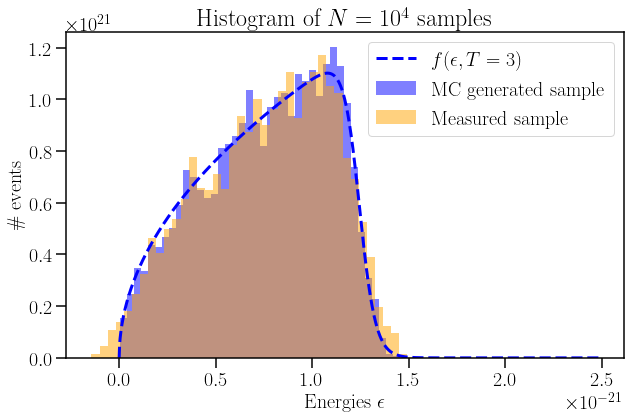

In [63]:
for i in range(len(data6)):
    measured[i] = data6[i] + np.random.normal(0,uncertainty)
mesPos = measured[measured>=0]

plt.hist(data6      , density=True, bins = 40, color = "blue"  , alpha = 0.5, label = "MC generated sample")
plt.hist(measured   , density=True, bins = 40, color = "orange", alpha = 0.5, label = "Measured sample")
plt.plot(xfunc, yfunc3,"--",lw=3, color = "blue", label = "$f(\epsilon, T=3)$")

plt.title("Histogram of $N=10^4$ samples")
plt.xlabel("Energies $\epsilon$")
plt.ylabel("\# events")
plt.legend()

#plt.savefig(path+"MeasuredSample.png")

a) Likelihood

3.0791583166332663 0.0
T =  3.0791583166332663 +-  0.013026052104208485
mu =  127.54 +- 0.54
Expected result :  124.26


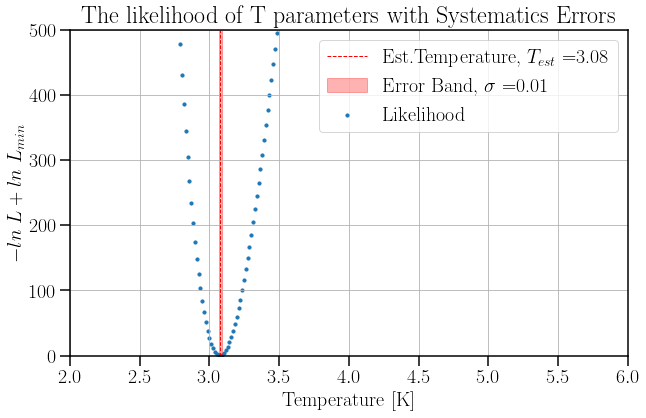

In [64]:
listLikeliHood = np.zeros(len(Ttest))

for i in range(len(Ttest)):
    l = LLH(mesPos,Ttest[i])
    listLikeliHood[i] = l

Lmin = min(listLikeliHood)
indexLmin = (listLikeliHood.tolist()).index(Lmin)

for i in range(len(Ttest)): #Normalize
    listLikeliHood[i] -= Lmin

TParam = Ttest[indexLmin]
print (TParam,min(listLikeliHood))

i1=0
i2=0
for i in range(0,len(Ttest)-1):
    if listLikeliHood[i]>0.5 and listLikeliHood[i+1]<0.5:
        i1=i
    if listLikeliHood[i]<0.5 and listLikeliHood[i+1]>0.5:
        i2=i
err = (Ttest[i2]-Ttest[i1])/2



plt.scatter(Ttest,listLikeliHood, s=10, label = "Likelihood")
plt.fill([TParam-err,TParam-err,TParam+err,TParam+err],[0,500,500,0], color = "red", alpha = 0.3, label="Error Band, $\sigma=$"+str("{:.2f}".format(err)))
plt.plot([TParam,TParam],[0,500], "--", lw =1, color = "red", label = "Est.Temperature, $T_{est}=$"+ str("{:.2f}".format(Ttest[indexLmin])))

plt.title("The likelihood of T parameters with Systematics Errors")
plt.xlabel("Temperature [K]")
plt.ylabel("$-ln\ L+ln\ L_{min}$")
plt.grid(True)
plt.ylim(0,500)
plt.xlim(2,6)
plt.legend()

#plt.savefig(path+"LLH_SysErr.png")

print ('T = ', TParam, "+- ",err)
print("mu = "               , str("{:.2f}".format(30*kb*Ttest[indexLmin]*1e23)), "+-",str("{:.2f}".format(30*kb*err*1e23)) )
print("Expected result : "  , str("{:.2f}".format(mu*1e23)))

In [65]:
result_sysErr_LLH   = np.zeros(Nexp)
std_sysErr_LLH      = np.zeros(Nexp)
result_sysErr_LLH2  = np.zeros(Nexp)
std_sysErr_LLH2     = np.zeros(Nexp)
for i in range(Nexp):
    
    dat = Egenerator(N,T)
    measured    = np.zeros(len(dat))
    for n in range(len(dat)):
        measured[n] = dat[n] + np.random.normal(0,uncertainty)
    dat = measured[measured>=0]

    dat2 = Egenerator(N2,T)
    measured2    = np.zeros(len(dat2))
    for n in range(len(dat2)):
        measured2[n] = dat2[n] + np.random.normal(0,uncertainty)
    dat2 = measured2[measured2>=0]


    minimPar    = minimize_scalar(lambda x  : LLH(dat,x), [0.5,9]                           , bounds = (0.5,9)  , method="bounded")
    errPos      = minimize_scalar(lambda ep :(abs(LLH(dat,ep+minimPar.x)-minimPar.fun-0.5)) , bounds=(0,1)      , method="bounded")
    errMin      = minimize_scalar(lambda ep :(abs(LLH(dat,-ep+minimPar.x)-minimPar.fun-0.5)), bounds=(-1,0)     , method="bounded")
    err         = (abs(errPos.x)+abs(errMin.x))/2

    minimPar2   = minimize_scalar(lambda x: LLH(dat2,x),[0.5,9]                                 , bounds = (0.5,9)  , method="bounded")
    errPos2     = minimize_scalar(lambda ep :( abs(LLH(dat2,ep+minimPar2.x)-minimPar2.fun-0.5) ), bounds=(0,1)      , method="bounded")
    errMin2     = minimize_scalar(lambda ep :( abs(LLH(dat2,-ep+minimPar2.x)-minimPar2.fun-0.5)), bounds=(-1,0)     , method="bounded")
    err2        = (abs(errPos2.x)+abs(errMin2.x))/2

    result_sysErr_LLH[i]    = minimPar.x
    std_sysErr_LLH[i]       = err
    result_sysErr_LLH2[i]   = minimPar2.x
    std_sysErr_LLH2[i]      = err2

3.0663781556143195 3.0652419533404247


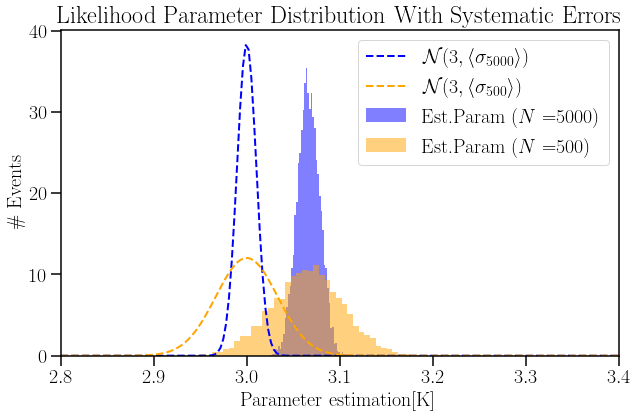

In [66]:
x = np.linspace(2.8,3.4,200)
y = gauss(x,3,np.mean(std_sysErr_LLH))
y2 = gauss(x,3,np.mean(std_sysErr_LLH2))

plt.hist(result_sysErr_LLH  , bins = 50, density=True, color = "blue"   , alpha = 0.5, label = "Est.Param $(N=$"+str(N)+"$)$")
plt.hist(result_sysErr_LLH2 , bins = 50, density=True, color = "orange" , alpha = 0.5, label = "Est.Param $(N=$"+str(N2)+"$)$")
plt.plot(x,y    , "--", lw = 2, color = "blue"  , label = r"$\mathcal{N}(3,\langle\sigma_{5000}\rangle)$")
plt.plot(x,y2   , "--", lw = 2, color = "orange", label = r"$\mathcal{N}(3,\langle\sigma_{500}\rangle)$")
plt.xlim(2.8,3.4)

plt.title("Likelihood Parameter Distribution With Systematic Errors")
plt.xlabel("Parameter estimation[K]")
plt.ylabel("\# Events")
plt.legend()

plt.savefig(path+"LLH_SysErr_Dist.png")

print(np.mean(result_sysErr_LLH),np.mean(result_sysErr_LLH2))


b) Least Square

mu =  126.46 +- 0.54
Expected result :  124.26


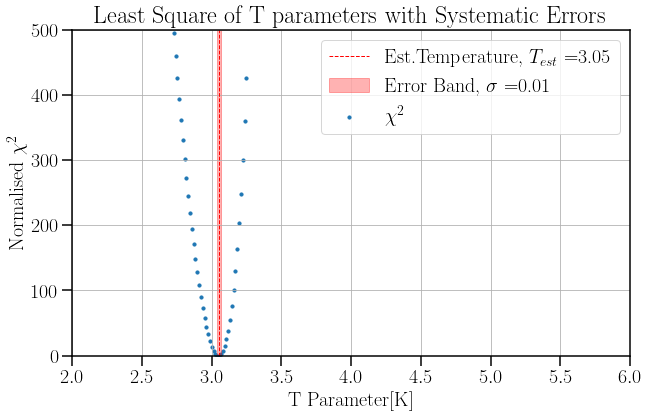

In [67]:
x2List  = LeastSquare(mesPos, nBins, Ttest)
jmin    = x2List.index(min(x2List))
x2Min   = x2List[jmin]
parMin  = Ttest[jmin]

for i in range(len(x2List)):
    x2List[i] = x2List[i]-x2Min

j1=0
j2=0
for i in range(len(Ttest)-1):
    if x2List[i]>1 and x2List[i+1]<1:
        j1=i
    if x2List[i]<1 and x2List[i+1]>1:
        j2=i

err = (Ttest[j2]-Ttest[j1])/2

plt.scatter(Ttest, x2List, s=10, label = "$\chi^2$")
plt.fill([parMin-err,parMin-err,parMin+err,parMin+err], [0,500,500,0], color = "red", alpha = 0.3, label="Error Band, $\sigma=$"+str("{:.2f}".format(err)))
plt.plot([parMin,parMin],[0,500], "--", lw = 1, color = "red" , label = "Est.Temperature, $T_{est}=$"+ str("{:.2f}".format(parMin)))

plt.xlabel("T Parameter[K]")
plt.ylabel("Normalised $\chi^2$")
plt.title("Least Square of T parameters with Systematic Errors")
plt.ylim(0,500)
plt.xlim(2,6)
plt.grid()
plt.legend()

#plt.savefig(path+"x2_SysErr.png")

print("mu = " , str("{:.2f}".format(30*kb*parMin*1e23)), "+-",str("{:.2f}".format(30*kb*err*1e23)) )
print("Expected result : ",  str("{:.2f}".format(mu*1e23)))

Correct Least square such that the bins are defined as Nbins from the maximal MC generated sample

In [68]:
result_SysErr_x2= np.zeros(Nexp)
std_SysErr_x2   = np.zeros(Nexp)
t               = []

for i in range(Nexp):
    t0 =time.time()

    dat      = Egenerator(N,3)
    measured    = np.zeros(len(dat))
    for n in range(len(dat)):
        measured[n] = dat[n] + np.random.normal(0,uncertainty)
    dat = measured[measured>=0]
    
    minimPar = minimize_scalar(lambda x  : LS(dat, nBins, x),[1]                             , bounds = (0.5,7) , method = "bounded")
    errPos   = minimize_scalar(lambda ep :( abs(LS(dat,nBins,ep+minimPar.x)-minimPar.fun-1)) , bounds=(0,1)     , method = "bounded")
    errMin   = minimize_scalar(lambda ep :( abs(LS(dat,nBins,-ep+minimPar.x)-minimPar.fun-1)), bounds=(-1,0)    , method = "bounded")
    err      = (abs(errPos.x)+abs(errMin.x))/2

    result_SysErr_x2[i] = minimPar.x
    std_SysErr_x2[i]    = err
    t.append(time.time()-t0)
    
    if(i==10):
        print(" Time for 1 loop is approx:", np.mean(t)
            , "\n Comp is finished in ", np.mean(t)*Nexp, "s"
            , " = " , np.mean(t)*Nexp/60 , "min" )

 Time for 1 loop is approx: 1.095211224122481 
 Comp is finished in  5476.056120612405 s  =  91.26760201020674 min


3.0419266443440183


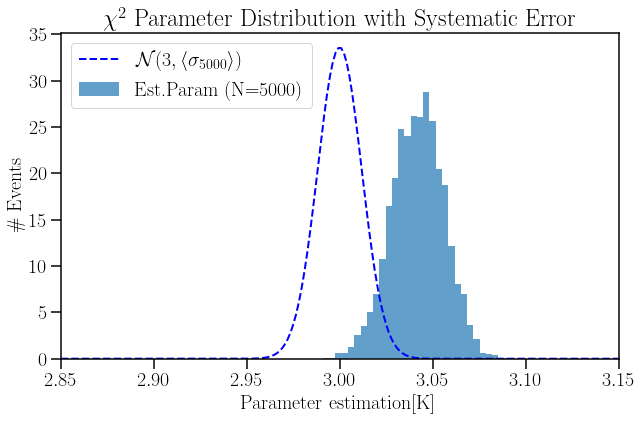

In [69]:
x = np.linspace(2.85,3.15,200)
y = gauss(x,3,np.mean(std_SysErr_x2))
plt.hist(result_SysErr_x2, bins = 30, density=True, alpha = 0.7, label = "Est.Param (N=5000)")
plt.plot(x,y, "--", lw = 2,  color = "blue", label = r"$\mathcal{N}(3,\langle\sigma_{5000}\rangle)$")
plt.xlim(2.85,3.15)

plt.xlabel("Parameter estimation[K]")
plt.ylabel("\# Events")
plt.title("$\chi^2$ Parameter Distribution with Systematic Error")
plt.legend()

#plt.savefig(path+"x2_SysErr_Dist.png")

print(np.mean(result_SysErr_x2))

c) Method of moments

T = 3.04 +- 0.02
mu = 125.93 +- 0.79


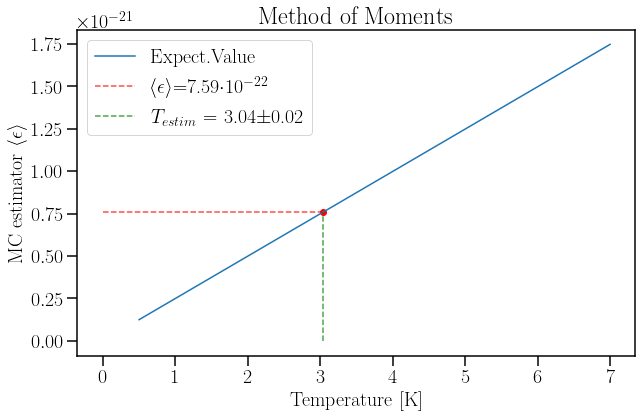

In [70]:
dat     = mesPos
MC_est  = (1/N)*np.sum(dat)
MC_var  = (1/N)*np.sum(np.power(dat,2))-np.power(MC_est,2)
MC_std  = np.sqrt(MC_var)/np.sqrt(N)

#linear relation between exp.val and Temp
E_T     = delta*Ttest

T_est   = MC_est/delta
T_std   = MC_std/delta
mu_est  = MC_est/gamma
mu_std  = MC_std/gamma

plt.plot(Ttest,E_T, label = "Expect.Value")
plt.plot([0,T_est]      ,[MC_est,MC_est], "--"  , color = "red"     , alpha = 0.7, label = r"$\langle\epsilon\rangle$="+str("{:.2f}".format(MC_est*1e22))+"$\cdot 10^{-22}$")
plt.plot([T_est,T_est]  ,[0,MC_est]     , "--"  , color = "green"   , alpha = 0.7, label = r"$T_{estim}$ =  "+str("{:.2f}".format(T_est))+"$\pm$"+str("{:.2f}".format(T_std)))

plt.scatter(T_est, delta*T_est        , color = "red")

plt.title("Method of Moments")
plt.xlabel("Temperature [K]")
plt.ylabel(r"MC estimator $\langle\epsilon\rangle$")

plt.legend()

#plt.savefig(path+"Mom_SysErr.png")


print("T = "  +str("{:.2f}".format(T_est))        + " +- " +str("{:.2f}".format(T_std)))
print("mu = " +str("{:.2f}".format(mu_est*1e23)) + " +- " +str("{:.2f}".format(mu_std*1e23)))

In [71]:
result_Mom_SysErr      = np.zeros(Nexp)
std_Mom_SysErr         = np.zeros(Nexp)

for i in range(Nexp):

    dat = Egenerator(N,T)
    measured    = np.zeros(len(dat))
    for n in range(len(dat)):
        measured[n] = dat[n] + np.random.normal(0,uncertainty)
    dat = measured[measured>=0]

    MC_est   = (1/N)*np.sum(dat)
    MC_var   = (1/N)*np.sum(np.power(dat,2))-np.power(MC_est,2)
    MC_std   = np.sqrt(MC_var)

    T_est   = MC_est/delta
    T_std   = MC_std/delta

    result_Mom_SysErr[i] = T_est
    std_Mom_SysErr[i] = T_std

3.0028077165173377


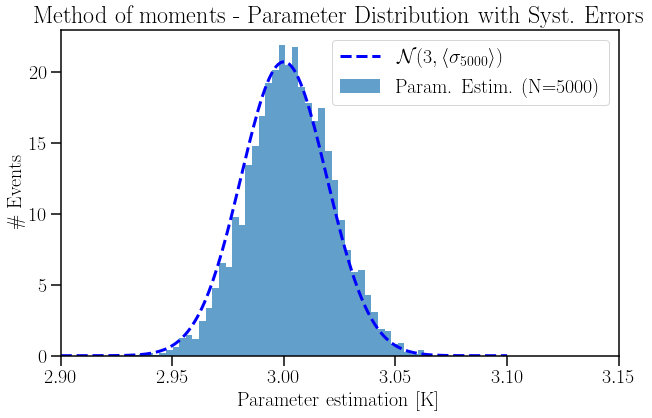

In [72]:
x = np.linspace(2.9,3.1,200)
y = gauss(x,3,np.mean(std_Mom_SysErr)/np.sqrt(N))

plt.hist(result_Mom_SysErr, bins = 50, density=True, alpha = 0.7, label = "Param. Estim. (N=5000)")
plt.plot(x,y, "--", lw = 3, color = "blue"   , label = r"$\mathcal{N}(3,\langle\sigma_{5000}\rangle)$")

plt.title("Method of moments - Parameter Distribution with Syst. Errors")
plt.xlabel("Parameter estimation [K]")
plt.ylabel("\# Events")
plt.xlim(2.9,3.15)
plt.legend()

plt.savefig(path+"Mom_SysErr_Dist.png")

print(np.mean(result_Mom_SysErr))


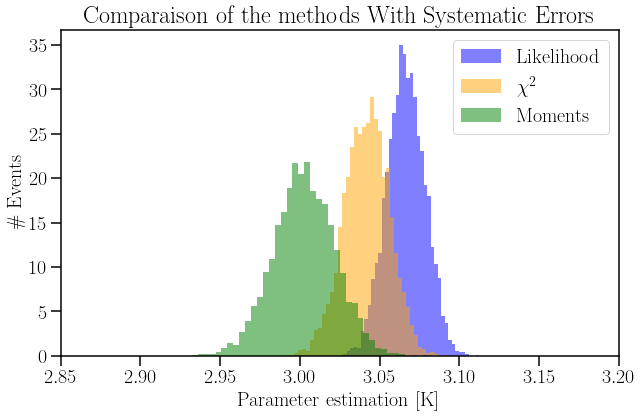

In [73]:
c1,_,_=plt.hist(result_sysErr_LLH, density=True, color="blue"   , alpha=0.5, bins=40, label="Likelihood")
c2,_,_=plt.hist(result_SysErr_x2 , density=True, color="orange" , alpha=0.5, bins=40, label=r"$\chi^2$")
c3,_,_=plt.hist(result_Mom_SysErr ,density=True, color="green"  , alpha=0.5, bins=40, label="Moments")

plt.title("Comparaison of the methods With Systematic Errors")
plt.xlabel("Parameter estimation [K]")
plt.ylabel("\# Events")
plt.xlim(2.85, 3.2)
plt.legend()

plt.savefig(path+"MethodComp_SysErr.png")